# HERA Redundancy Analysis Simulated Data

## Shane Bechtel

In [1]:
#Base number for all Reds
#Add controllable noise to all bls,time,freqs
#Controllable Random Non redundant signal

import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
from pyuvdata import uvutils
from hera_qm import ant_metrics
import hera_cal
from copy import deepcopy

from matplotlib.colors import SymLogNorm
import sys
import os
from hera_qm import xrfi as xrfi
import numpy.ma as ma
import glob
import math

In [2]:

data_file_list = ['/data6/HERA/data/2458042/zen.2458042.12552.xx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yy.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.yx.HH.uv','/data6/HERA/data/2458042/zen.2458042.12552.xy.HH.uv']

uv = UVData()

uv.read_miriad(data_file_list)


Combined polarizations are not evenly spaced. This will make it impossible to write this data out to some file types.


In [3]:
print uv.data_array

print uv.data_array.shape


[[[[  1.23977661e-05 -0.00000000e+00j   1.14440918e-05 -0.00000000e+00j
      0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j]
   [  2.86102295e-06 -0.00000000e+00j   9.53674316e-07 -0.00000000e+00j
      0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j]
   [  9.53674316e-07 -0.00000000e+00j   9.53674316e-07 -0.00000000e+00j
      0.00000000e+00 +0.00000000e+00j   0.00000000e+00 +0.00000000e+00j]
   ..., 
   [  2.16969505e-01 +8.75410855e-13j   1.25322342e-01 +8.22675261e-13j
      2.06470490e-03 +5.46455383e-04j   2.06470490e-03 -5.46455383e-04j]
   [  2.24554077e-01 +5.90638649e-13j   1.31620407e-01 -8.43769499e-13j
      2.77709961e-03 +2.25067139e-04j   2.77709961e-03 -2.25067139e-04j]
   [  4.89999962e+01 -0.00000000e+00j   4.89999962e+01 -0.00000000e+00j
      4.89999962e+01 +0.00000000e+00j   4.89999962e+01 +0.00000000e+00j]]]


 [[[  0.00000000e+00 -0.00000000e+00j   0.00000000e+00 -0.00000000e+00j
      0.00000000e+00 -0.00000000e+00j   0.000

In [4]:

aa = hera_cal.utils.get_aa_from_uv(uv)

info = hera_cal.omni.aa_to_info(aa)

reds = info.get_reds()


In [5]:
print reds

[[(23, 71), (36, 87), (37, 88), (65, 122), (66, 123), (67, 124), (82, 142), (83, 143)], [(41, 50), (55, 65), (86, 98), (71, 82)], [(0, 70), (1, 71), (11, 86), (12, 87), (36, 121), (37, 122), (38, 123), (39, 124), (51, 141), (52, 142), (53, 143), (13, 88)], [(0, 14), (11, 26), (23, 39), (24, 40), (25, 41), (37, 54), (38, 55), (50, 68), (51, 69), (52, 70), (65, 84), (66, 85), (67, 86), (120, 142), (121, 143), (12, 27), (36, 53), (53, 71), (68, 87), (69, 88)], [(0, 27), (11, 40), (12, 41), (23, 54), (24, 55), (36, 69), (38, 71), (50, 85), (51, 86), (52, 87), (53, 88), (82, 121), (83, 122), (84, 123), (85, 124), (37, 70)], [(0, 1), (1, 2), (11, 12), (12, 13), (13, 14), (23, 24), (24, 25), (25, 26), (26, 27), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (120, 121), (121, 122), (122, 123), (123, 124), (141, 142), (142, 

In [6]:

am = ant_metrics.Antenna_Metrics(data_file_list, reds, fileformat = 'miriad')


In [7]:

bases = []

lst = uv.get_antpairpols()

for i in range(uv.Nbls):
    
    pair = lst[4*i]
    
    bases.append((pair[0],pair[1]))
    
print bases


[(0, 0), (0, 1), (0, 2), (0, 11), (0, 12), (0, 13), (0, 14), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 98), (0, 120), (0, 121), (0, 122), (0, 123), (0, 124), (0, 141), (0, 142), (0, 143), (1, 1), (1, 2), (1, 11), (1, 12), (1, 13), (1, 14), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 98), (1, 120), (1, 121), (1, 122), (1, 123), (1, 124), (1, 141), (1, 142), (1, 143), (2, 2), (2, 11), (2, 12), (2, 13), (2, 14), (2, 23), (2, 24), (2, 25), (2, 26), (2, 27), (2, 36), (2, 37), (2, 38), (2, 39), (2, 40), (2, 41), (2, 50),

In [8]:

nonreds = []

for i in bases:
    
    flag = 0
    
    for j in reds:
        
        for k in j:
            
            if i == k:
                
                flag = 1
                
    if flag == 0:
        
        nonreds.append(i)
        
    
print nonreds


[(0, 0), (0, 98), (0, 143), (1, 1), (1, 98), (2, 2), (2, 98), (2, 120), (2, 141), (11, 11), (12, 12), (13, 13), (13, 98), (14, 14), (14, 98), (14, 120), (23, 23), (24, 24), (25, 25), (26, 26), (26, 98), (27, 27), (27, 98), (36, 36), (37, 37), (38, 38), (39, 39), (40, 40), (40, 98), (41, 41), (41, 98), (50, 50), (51, 51), (52, 52), (53, 53), (54, 54), (55, 55), (55, 98), (65, 65), (65, 124), (66, 66), (67, 67), (68, 68), (69, 69), (70, 70), (71, 71), (71, 98), (82, 82), (83, 83), (84, 84), (85, 85), (86, 86), (87, 87), (87, 98), (88, 88), (88, 98), (98, 98), (98, 124), (98, 143), (120, 120), (121, 121), (122, 122), (123, 123), (124, 124), (141, 141), (142, 142), (143, 143)]


In [9]:

v = deepcopy (uv)


In [10]:

def signal(amp,width):
    
    temp = np.zeros((60,1024,4))
    
    for i in range(3):
        
        for j in range(10):
            
            temp[i][j][0] = np.random.normal(amp,width)
            
    result = np.fft.fftn(temp)
    
    return result
    

In [11]:

def signal_adv(amp,width,baseline):
    
    ant_1 = baseline[0]
    
    ant_2 = baseline[1]
    
    ant_1_ind = np.where(uv.antenna_numbers==ant_1)
    
    ant_2_ind = np.where(uv.antenna_numbers==ant_2)
    
    dist = np.linalg.norm(uv.antenna_positions[ant_1_ind]-uv.antenna_positions[ant_2_ind])
    
    c = float(3e8)
    
    B = float(uv.freq_array[0][-1]-uv.freq_array[0][1])
    
    del_tau = 2.*np.pi / B
    
    tau = dist / c
    
    temp = np.zeros((60,1024,4))
    
    T = uv.Ntimes*10
    
    del_nu = 2.*np.pi / T
    
    earth_rot = 2*np.pi / 86164.09053
    
    freq_naught = np.median(uv.freq_array[0])
    
    nu = earth_rot * dist * freq_naught / c
    
    for i in range(uv.Ntimes/2):
        
        for j in range(int(math.ceil(float(tau/del_tau)))):
            
            temp[i][j][0] = np.random.normal(amp,width) * np.exp(-i*(del_nu/nu))
            
            if (i != 0):
            
                temp[-i][j][0] = np.random.normal(amp,width) * np.exp(-i*(del_nu/nu))
            
    result = np.fft.fftn(temp)
    
    return result


In [12]:

def noise(amp,width):
    
    result = np.random.normal(amp,width,(60,1024,4))
    
    return result


In [13]:

new_data_array = np.zeros((67680, 1, 1024, 4),dtype = complex)

signal_data_array = np.zeros((67680, 1, 1024, 4),dtype = complex)

noise_data_array = np.zeros((67680, 1, 1024, 4),dtype = complex)

s_width = 1

s_amp = 0

i_width = 0.3

i_amp = 0

n_width = 3

n_amp = 0

for i in reds:
        
    #sig = signal_adv(s_amp,s_width,i[0])
    
    sig = signal(s_amp,s_width)
    
    print 'working'
        
    for j in i:
            
        indices = v.antpair2ind(j[0],j[1])
            
        noi = noise(n_amp,n_width)
        
        #i_sig = signal_adv(i_amp,i_width,j)
        
        i_sig = signal(i_amp,i_width)
            
        visibility = sig + noi + i_sig
            
        new_data_array[indices,0,:,:] = visibility
            
        signal_data_array[indices,0,:,:] = sig
            
        noise_data_array[indices,0,:,:] = noi
            

working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working


In [14]:
print new_data_array

[[[[  0.00000000+0.j           0.00000000+0.j           0.00000000+0.j
      0.00000000+0.j        ]
   [  0.00000000+0.j           0.00000000+0.j           0.00000000+0.j
      0.00000000+0.j        ]
   [  0.00000000+0.j           0.00000000+0.j           0.00000000+0.j
      0.00000000+0.j        ]
   ..., 
   [  0.00000000+0.j           0.00000000+0.j           0.00000000+0.j
      0.00000000+0.j        ]
   [  0.00000000+0.j           0.00000000+0.j           0.00000000+0.j
      0.00000000+0.j        ]
   [  0.00000000+0.j           0.00000000+0.j           0.00000000+0.j
      0.00000000+0.j        ]]]


 [[[ 10.96509127+0.j           8.27704444+0.j           5.71357962+0.j
     10.97662002+0.j        ]
   [  8.67239626-0.11770262j   8.31621180-0.11770262j
      5.40753818-0.11770262j   6.35377477-0.11770262j]
   [  9.39063142-0.23542513j   7.67979941-0.23542513j
     14.55050864-0.23542513j   9.72522592-0.23542513j]
   ..., 
   [  3.91910240+0.35318702j   6.21529467+0.35318702j

In [15]:

for i in nonreds:
    
    print 'working'
        
    #sig = signal_adv(s_amp,s_width,i)
    
    sig = signal(s_amp,s_width)
    
    indices = v.antpair2ind(i[0],i[1])
            
    noi = noise(n_amp,n_width)
            
    visibility = sig + noi
            
    new_data_array[indices,0,:,:] = visibility
            
    signal_data_array[indices,0,:,:] = sig
            
    noise_data_array[indices,0,:,:] = noi
        

working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working
working


In [16]:
v.data_array = new_data_array


In [17]:
am.data.data_array = new_data_array

In [18]:
am.xants = []

In [19]:
z_scores = ant_metrics.red_corr_metrics(v,['xx','yy','xy','yx'],['x','y'],uv.antenna_numbers,reds,am.xants)

In [20]:
rawRed = ant_metrics.red_corr_metrics(v,['xx','yy','xy','yx'],['x','y'],uv.antenna_numbers,reds,am.xants,rawMetric = True)

In [21]:

values = []

for key in z_scores.keys():
    
    values.append(z_scores[key]) 

print values

[0.39302509606519992, -1.3811960443371525, -0.21987226412903479, 0.6264113153495926, -1.6198837313375574, -1.047021777646467, 0.0034460193609227906, 0.47113735042707872, 1.0490104397071827, -0.0074536582449027449, 0.0, -0.23430991511259811, 0.74157307264301808, 1.0144927418844814, -0.58050429025973205, -0.074513756906648562, 0.26828674073101505, 0.36419806543199845, -1.5861678015950995, -0.85173296896139328, 0.11493043165435693, 1.7026366295549984, 0.18148399881607136, 0.60922010626515843, 0.35245938700632184, 1.0241292027334046, 0.27664859820454207, -0.64660106260231687, 1.7159213953120389, 0.67449999999999999, 0.67935773516188336, -1.602961290392855, 0.15841120031305633, 0.91295276138694015, 0.1929584110133995, 0.62483996826489541, -1.6156133318646719, 0.10142268713061051, -0.63529296628389875, -0.71704756505247291, -1.0203763681970484, 0.37884423812769147, -1.2642850631035563, -1.7609484586613104, -1.1177571825703643, 0.48464034307575471, 0.66634699974749878, -2.9312827041034422, 0.

In [22]:
values_raw = []

for key in rawRed.keys():
    
    values_raw.append(rawRed[key])
    
print values_raw

[0.72086199054201672, 0.71119595264841184, 0.71724703542359969, 0.7229177756926406, 0.70898957022971454, 0.71305098031083891, 0.71888220975060069, 0.72267737494105577, 0.72147840114856998, 0.72468622016049589, 0.71882170478212848, 0.71854387306434153, 0.71756240784088987, 0.72234033915187112, 0.72452749441443187, 0.71511997684349238, 0.71810438041122127, 0.72012626612001018, 0.72088477275871654, 0.70918843154110289, 0.71413504386205351, 0.71950106849990458, 0.72858626417019257, 0.7194260859466497, 0.72224490939685737, 0.7206227282656249, 0.72458433162035196, 0.72017558553535865, 0.71527374722335901, 0.72866461959328521, 0.722522169245287, 0.70996491630898284, 0.71974243366977309, 0.72392859728081194, 0.71993420795611618, 0.72233161648049893, 0.70989468383073484, 0.71961429129917132, 0.71479682550088897, 0.714882693142324, 0.71252554925600153, 0.7209660748163772, 0.71108694135467321, 0.70908791710031016, 0.71265832250942818, 0.72140235019701815, 0.72256202527991953, 0.70259129956874433,

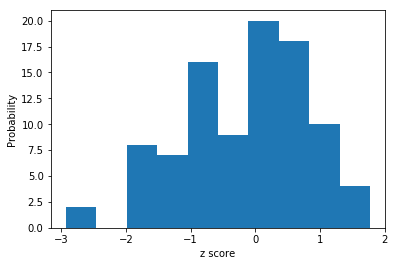

In [23]:
plt.hist(values)
plt.xlabel('z score')
plt.ylabel('Probability')
plt.show()

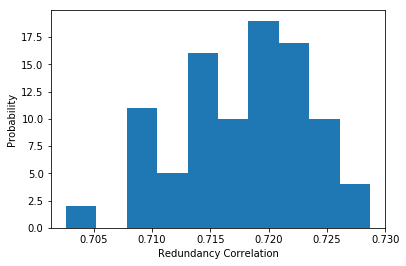

In [24]:
plt.hist(values_raw)
plt.xlabel('Redundancy Correlation')
plt.ylabel('Probability')
plt.show()

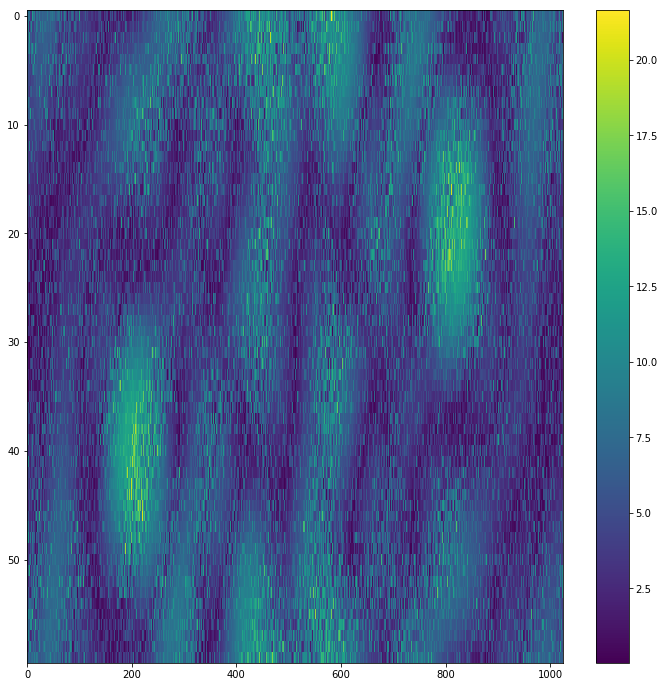

In [25]:

data = v.get_data(23,71,'xx')

plt.figure(figsize=(12,12))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


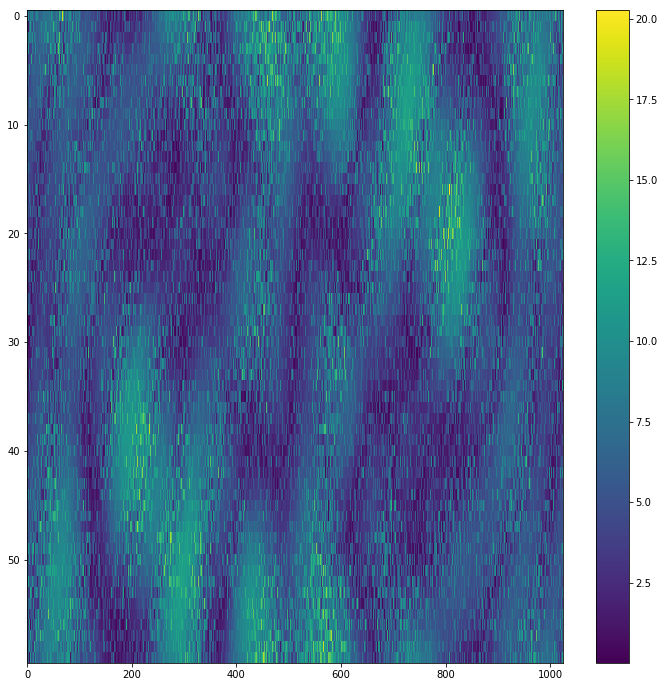

In [26]:

data = v.get_data(36,87,'xx')

#get the times from a portion of above, convert to LST so we can check it against a good time


plt.figure(figsize=(12,12))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()

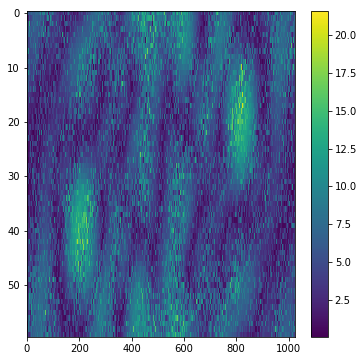

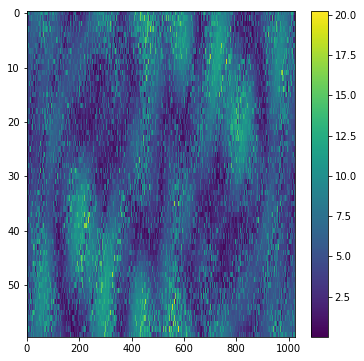

In [27]:

data = v.get_data(23,71,'xx')

plt.figure(figsize=(6,6))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()



data = v.get_data(36,87,'xx')

plt.figure(figsize=(6,6))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()

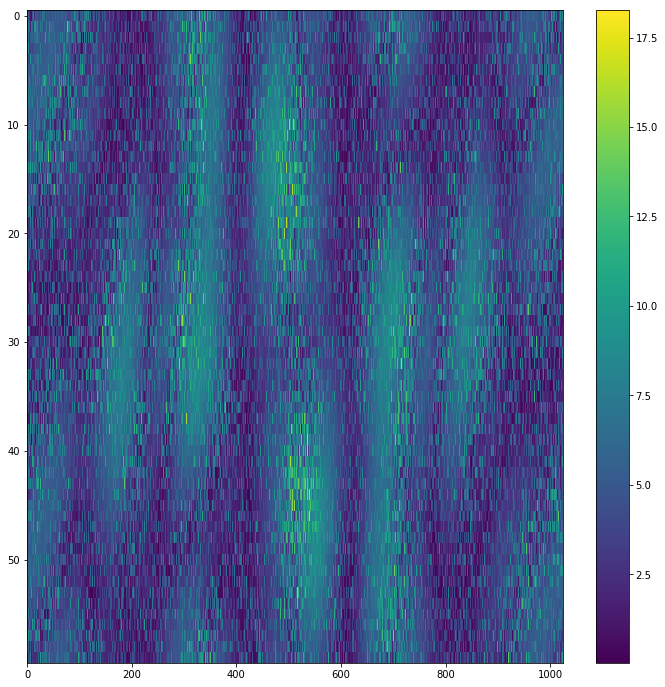

In [28]:

data = v.get_data(0,143,'xx')

plt.figure(figsize=(12,12))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()


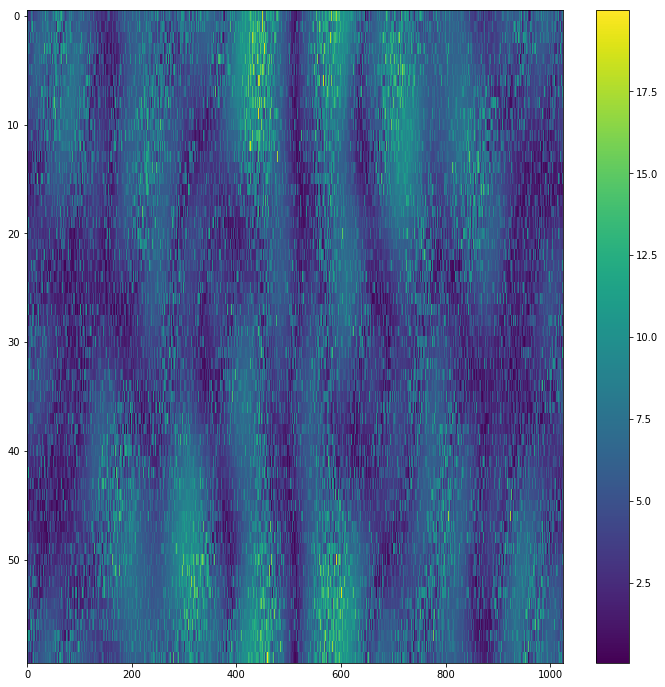

In [29]:

data = v.get_data(0,70,'xx')

plt.figure(figsize=(12,12))
#plt.imshow(np.angle(data), aspect='auto', norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.imshow(np.abs(data), aspect='auto')
plt.colorbar()
plt.show()
